In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_files('uciml/iris', path='datasets', unzip=True)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

points = {"blue": [[2,4], [1,3], [2,3], [3,2], [2,1]],
           "red": [[5,6], [4,5], [4,6], [6,6], [5,4]]}

new_point = [3,3]

def euclidean_distance(p, q): # p and q are the data points
    return np.sqrt(np.sum((np.array(p) - np.array(q))**2))

class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        self.point = None

    def fit(self, points): # training the model means literally just having the points existing, because the points IS the trained model.
        self.points = points

    def predict(self, new_point): # calculating the distance between the one new points to predict for between points
        distances = []

        for category, points in zip(self.points.keys(), self.points.values()):
            for point in points:
                distance = euclidean_distance(new_point, point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances,key=lambda x: x[0])[:self.k]] # use the first element of each sublist as the key to sort.”)
        most_common = Counter(categories).most_common(1)[0][0]
        return most_common


In [4]:
model = KNearestNeighbors(3)
model.fit(points)
model.predict(new_point)

'blue'

# Using IRIS dataset

In [5]:
import pandas as pd
from pathlib import Path

data_path = Path('datasets/Iris.csv')

dataset_df = pd.read_csv(data_path).drop(columns=["Id"])
dataset_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.model_selection import train_test_split

X = dataset_df.drop(columns=['Species'])
y = dataset_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [7]:
train_df = pd.concat([X_train, y_train], axis=1)

# Group by species and convert to dict
train_grouped = train_df.groupby("Species")
train_species_dict = {species: datapoint.drop(columns=["Species"]).values.tolist()
                for species, datapoint in train_grouped}

In [8]:
X_test = X_test.values.tolist()

model = KNearestNeighbors(5)
model.fit(train_species_dict)
y_preds = [model.predict(test_datapoint) for test_datapoint in X_test]

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# 1. Accuracy
acc = accuracy_score(y_test, y_preds)
print(f"Accuracy: {acc:.3f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_preds,
                      labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
print("Confusion Matrix:\n", cm)

# 3. Classification Report (precision, recall, f1)
print("\nClassification Report:\n",
      classification_report(y_test, y_preds,
                            target_names=['setosa','versicolor','virginica']))


Accuracy: 1.000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
category_names = list(train_species_dict.keys())

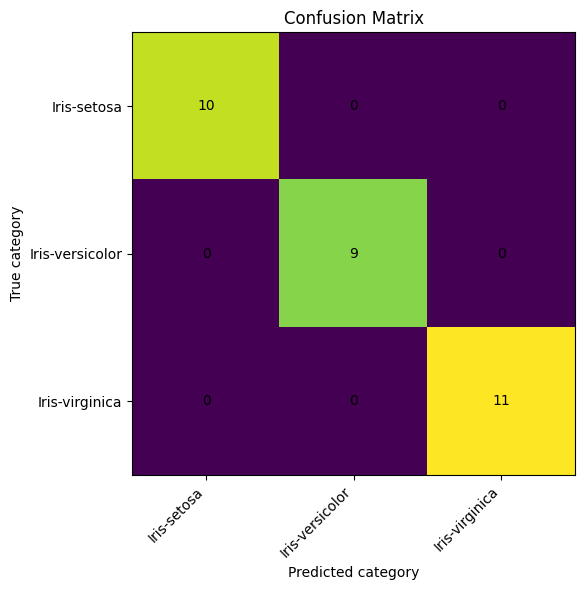

In [11]:
import matplotlib.pyplot as plt

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation='nearest')
ax.set_xticks(np.arange(len(category_names)))
ax.set_yticks(np.arange(len(category_names)))
ax.set_xticklabels(category_names, rotation=45, ha='right')
ax.set_yticklabels(category_names)
ax.set_xlabel('Predicted category')
ax.set_ylabel('True category')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [12]:
feature_names = dataset_df.drop(columns=['Species']).columns
feature_names = list(feature_names)

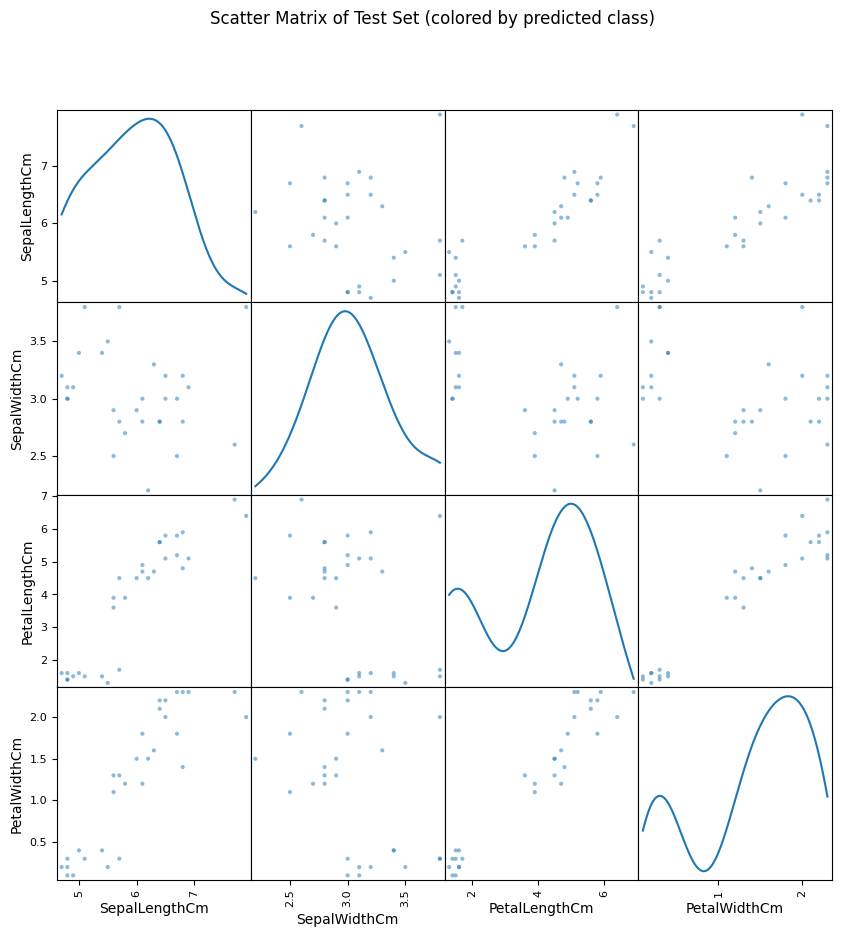

In [13]:
from pandas.plotting import scatter_matrix

# Create a DataFrame for scatter matrix
df_test = pd.DataFrame(X_test, columns=feature_names)
df_test['True'] = list(y_test)
df_test['Predicted'] = list(y_preds)

# Scatter matrix colored by predicted class
scatter_matrix(df_test[feature_names], figsize=(10, 10), diagonal='kde')
plt.suptitle("Scatter Matrix of Test Set (colored by predicted class)")
plt.show()

## With PCA

In [23]:
X_pca[:, 1]

array([ 0.45290865,  2.64686532,  0.52951306,  0.13839782, -0.46659087,
       -0.85620444,  0.60483303,  0.53213084,  0.64452882,  1.76750458,
       -0.67525004,  0.83944016,  0.5403401 ,  1.46820509,  1.04029358,
       -1.5217312 , -0.2647297 ,  0.43113783,  0.27543169,  1.90276342,
       -0.36357424,  0.82112857, -0.18466475,  0.4842258 ,  0.44686979,
       -0.75542362,  0.32392278,  0.44410018,  1.12644059, -2.58697759,
       -0.45061535,  0.14144543, -0.59659261,  0.09622731, -0.8248478 ,
        0.27804947, -0.16416147,  2.53435061, -0.37179665, -0.1281125 ,
       -1.12976004,  2.12212786,  0.02927785, -0.67525004, -1.69862212,
       -0.27844309,  0.99681735, -1.7025375 ,  1.47226857, -1.96743274,
       -0.39188326,  0.02295223, -0.1862717 , -1.5129359 ,  0.35175437,
       -0.44508489, -0.42916069,  0.2311603 ,  0.47048609,  0.39677307,
       -1.50142736,  0.91370478, -0.60480999, -0.77559252,  0.87849726,
       -1.28815311, -1.08715159, -0.9376756 , -1.64956626,  1.01

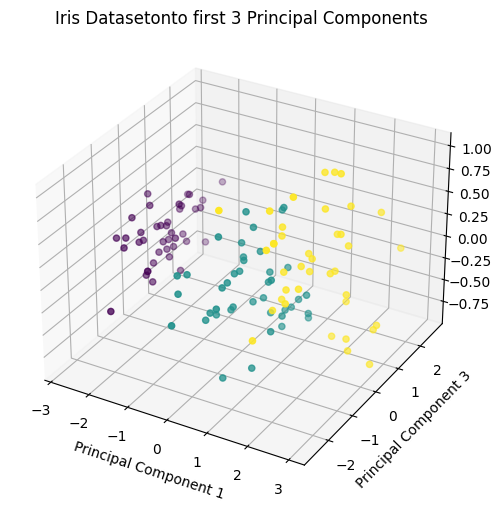

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 1. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train.values.tolist())

# 2. Apply PCA to reduce to 2 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


le = LabelEncoder()
y_labels = le.fit_transform(y_train) # Category->int mapping

plt.figure(figsize=(6, 6))
ax = plt.axes(projection ='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=list(y_labels))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('Iris Datasetonto first 3 Principal Components')
plt.show()


In [31]:
list(y_train)

['Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 '